# Decorators
    Decorators modify the behaviour of any function

    input function
    output function -> wrapper

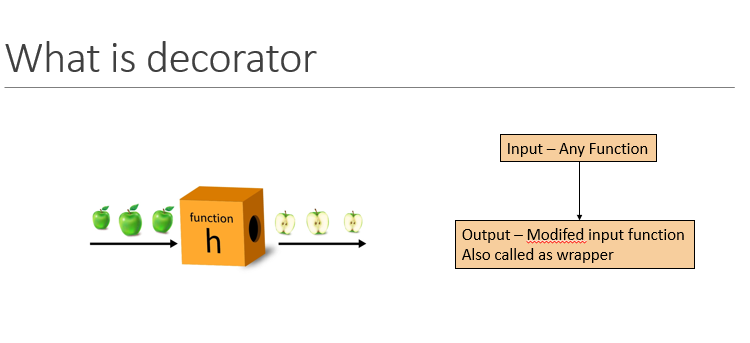

In [23]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print("Welcome User")
        result = func(*args, **kwargs)
        print(f"Function Results : {result}")
        print("Thank You")
        return result

    return wrapper

In [24]:
# call the decorator
import math

In [25]:
@welcome
def hypotenuse(a: float, b: float) -> float:
    c = math.sqrt(a**2 + b**2)
    return c

In [26]:
h1 = hypotenuse(3.0, 4.0)

Welcome User
Function Results : 5.0
Thank You


In [27]:
h1

5.0

In [28]:
h2 = hypotenuse(12.5, 13.2)

Welcome User
Function Results : 18.179383927955314
Thank You


In [29]:
# Apply welcome decorator on simple interst function
@welcome
def simple_intrest(p: float, n: float, r: float) -> tuple[float, float]:
    i = (p * n * r) / 100
    a = p + i
    return i, a

In [30]:
i1, a1 = simple_intrest(p=50_000, n=5.0, r=7.5)

Welcome User
Function Results : (18750.0, 68750.0)
Thank You


In [31]:
i1

18750.0

In [32]:
a1

68750.0

In [33]:
i2, a2 = simple_intrest(p=23_000.0, n=5.5, r=6.5)

Welcome User
Function Results : (8222.5, 31222.5)
Thank You


In [34]:
i2

8222.5

In [35]:
a2

31222.5

# Create a decorator to measure time required for execution


In [36]:
import time

In [37]:
time.sleep(2)  # This will keep kernal idle for 2 seconds
print("Hello")
time.sleep(3)
print("World")

Hello
World


In [38]:
start = time.perf_counter()  # start measuring the time
time.sleep(2)  # This will keep kernal idle for 2 seconds
print("Hello")
time.sleep(3)
print("World")
stop = time.perf_counter()  # stop measuring time
elapsed = stop - start
print(f"Time required for execution : {elapsed:.2f} sec")

Hello
World
Time required for execution : 5.00 sec


In [39]:
def measure_time(func):
    def wrapper(*args, **kwargs):
        # start measuring the time
        start = time.perf_counter()
        # Calsulate function results and print
        res = func(*args, **kwargs)
        print(f"Results : {res}")
        # Stop measuring time
        stop = time.perf_counter()
        # calculate time for execution
        elapsed = stop - start
        print(f"Time required for execute code : {elapsed:.2f}")
        return res

    return wrapper

In [40]:
@measure_time
def square(n: int) -> int:
    time.sleep(4.5)
    return n**2

In [41]:
s1 = square(24)

Results : 576
Time required for execute code : 4.50


In [44]:
import random

In [46]:
random.randint(1, 10)

8

In [47]:
@measure_time
def square_random(n: int) -> int:
    s = random.randint(1, 10)
    time.sleep(s)
    return n**2

In [48]:
s2 = square_random(12)

Results : 144
Time required for execute code : 1.00


In [49]:
s3 = square_random(44)

Results : 1936
Time required for execute code : 3.00


In [50]:
s4 = square_random(23)

Results : 529
Time required for execute code : 2.00


In [51]:
s4 = square_random(128)

Results : 16384
Time required for execute code : 5.00


In [55]:
def compound_intestest(p: float, n: float, r: float) -> float:
    time.sleep(3)
    a = p * (1 + (r / 100)) ** n
    i = a - p
    return i

In [56]:
i1 = compound_intestest(p=23_500.0, n=4, r=6.5)
print(i1)

6731.959239687494


In [57]:
# alternate way to call the decorator
comp_int_with_time = measure_time(compound_intestest)

In [58]:
i2 = comp_int_with_time(p=30_000.0, n=7.0, r=7.5)

Results : 19771.474201721176
Time required for execute code : 3.00


# Measure time requried for file download

In [59]:
url = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv


In [60]:
url.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'refs',
 'heads',
 'main',
 'artifacts',
 'data.csv']

In [61]:
url.split("/")[-1]

'data.csv'

In [71]:
from urllib.request import urlretrieve


@measure_time
def download_file(url: str):
    filename = url.split("/")[-1]
    print(f"{filename} dowmload started ...")
    urlretrieve(url, filename)
    print(f"{filename} download sucessful!")

In [63]:
url

'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/refs/heads/main/artifacts/data.csv'

In [64]:
download_file

<function __main__.measure_time.<locals>.wrapper(*args, **kwargs)>

In [72]:
download_file(url)

data.csv dowmload started ...
data.csv download sucessful!
Results : None
Time required for execute code : 1.21


In [73]:
import pandas as pd

In [74]:
df = pd.read_csv("data.csv")

In [75]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [76]:
df.shape

(193573, 11)

In [77]:
df.info

<bound method DataFrame.info of             id  carat        cut color clarity  depth  table     x     y  \
0            0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33   
1            1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12   
2            2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73   
3            3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41   
4            4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
0       4.55  13619  
1       5.0

In [78]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [79]:
df.describe(include="object").T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [85]:
a = (
    df.groupby(by="color")
    .agg({"price": "mean"})
    .sort_values(by="price", ascending=False)
    .round(2)
)

In [86]:
a

,price
color,
J,5756.31
I,5523.76
H,4776.55
G,4113.44
F,3652.35
E,2991.45
D,2976.19


<Axes: xlabel='color'>

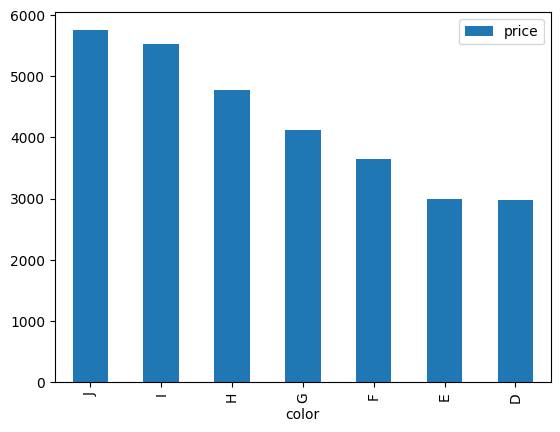

In [87]:
a.plot(kind="bar")